In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plot
%matplotlib inline

In [6]:
def get_path(nmb_of_itr, alg_prefix):
    return "./results/BY_CFOs/"+ alg_prefix + "-grasp.csv"

In [7]:
dimension = 10

cgrasp_df = pd.read_csv(get_path(dimension, "c"), sep=";")
dmcgrasp_df = pd.read_csv(get_path(dimension, "dmc"), sep=";")

In [8]:
algorthms_df = pd.merge(cgrasp_df, dmcgrasp_df, on=["Func", "Dim"], suffixes=["_c", "_dmc"])
#algorthms_df = algorthms_df.rename(columns={"Best F.O_c":"Best_c", "Avg F.O_c": "Avg_c", "Best F.O_dmc":"Best_dmc", "Avg F.O_dmc": "Avg_dmc" })

In [9]:
algorthms_df.query(" AvgFO_c > AvgFO_dmc ").shape

(15, 12)

In [10]:
algorthms_df.query(" AvgFO_c == AvgFO_dmc ").shape

(9, 12)

In [11]:
algorthms_df.query(" AvgFO_c < AvgFO_dmc ").shape

(18, 12)

In [12]:
algorthms_df.query(" CFO_c > CFO_dmc ").shape

(0, 12)

In [13]:
algorthms_df.query(" Time_c > Time_dmc ").shape

(24, 12)

In [14]:
def get_comparative_graph(metric, number_of_functions, title):
    functions_count = 15
    data_cfo = { "C-GRASP": list(algorthms_df[metric + "_c"][:number_of_functions]), "DMC-GRASP":  list(algorthms_df[metric + "_dmc"][:number_of_functions]) }
    dataFrame = pd.DataFrame(data=data_cfo, index=algorthms_df["Func"].sample(number_of_functions));
    dataFrame.plot.bar(rot=60, title=title);
    plot.show(block=False);

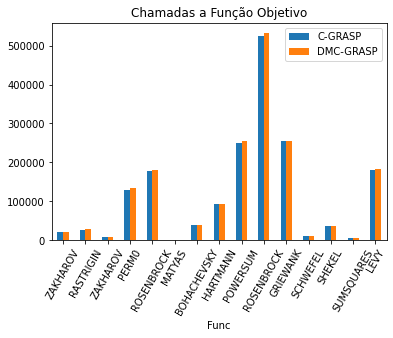

In [15]:
get_comparative_graph("CFO", 15, "Chamadas a Função Objetivo")

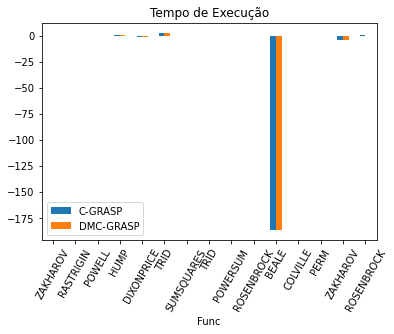

In [16]:
get_comparative_graph("AvgFO", 15, "Tempo de Execução")

In [17]:
metric="Avg"
mean_c = algorthms_df[metric + "_c"].mean()
mean_dmc = algorthms_df[metric + "_dmc"].mean()

KeyError: 'Avg_c'

In [18]:
print(mean_c, mean_dmc)

NameError: name 'mean_c' is not defined

In [27]:
dmc_loses = algorthms_df.query(" AvgFO_c > Avg_dmc ")

UndefinedVariableError: name 'Avg_dmc' is not defined

In [19]:
def load_and_preprocess_data(dimension=10):
    cgrasp_df = pd.read_csv(get_path(dimension, "c"), sep=";")
    dmcgrasp_df = pd.read_csv(get_path(dimension, "dmc"), sep=";")

    comparsion_df = pd.merge(cgrasp_df, dmcgrasp_df, on=["Func", "Dim"], suffixes=["_c", "_dmc"])
    comparsion_df = comparsion_df.rename(columns={"Best F.O_c":"Best_c", "Avg F.O_c": "Avg_c", "Best F.O_dmc":"Best_dmc", "Avg F.O_dmc": "Avg_dmc" })
    
    return comparsion_df

In [20]:
def get_loses_summary(data):
    loses = data.query(" Avg_c < Avg_dmc ")
    summary = {}
    summary['count'] = len(loses)
    gaps = abs(loses[metric + "_dmc"] - loses[metric + "_c"])
    summary['gaps'] = gaps
    summary['avg_gap'] = gaps.mean()
    
    return summary

def get_wins_summary(data):
    wins = data.query(" Avg_c > Avg_dmc ")
    summary = {}
    summary['count'] = len(wins)
    
    return summary

def get_draws_summary(data):
    draws = data.query(" Avg_c == Avg_dmc ")
    summary = {}
    summary['count'] = len(draws)
    return summary

In [21]:
data = load_and_preprocess_data(10)
loss_summary = get_loses_summary(data)

print(get_loses_summary(data)['count'], get_wins_summary(data)['count'], get_draws_summary(data)['count'])
print('gap:', get_loses_summary(data)['avg_gap'])

UndefinedVariableError: name 'Avg_c' is not defined

In [56]:
data = load_and_preprocess_data(20)
loss_summary = get_loses_summary(data)

print(get_loses_summary(data)['count'], get_wins_summary(data)['count'], get_draws_summary(data)['count'])
print('gap:', get_loses_summary(data)['avg_gap'])

UndefinedVariableError: name 'Avg_c' is not defined

In [32]:
data = load_and_preprocess_data(40)
loss_summary = get_loses_summary(data)

print(get_loses_summary(data)['count'], get_wins_summary(data)['count'], get_draws_summary(data)['count'])
print('gap:', get_loses_summary(data)['avg_gap'])

UndefinedVariableError: name 'Avg_c' is not defined

In [22]:
seed = 270100
#c_before_after_df = pd.read_csv("./results/backup/BY_CFOs/C/before_after_"+ str(seed) +".csv", sep=";")
dmc_before_after_df = pd.read_csv("./results/BY_CFOs/DMC/before_after_"+ str(seed) +".csv", sep=";")

In [23]:
dmc_before_after_df

,Func,Dim,ITR_1,ITR_2,ITR_3,ITR_4,ITR_5,ITR_6,ITR_7,ITR_8,...,ITR_11,ITR_12,ITR_13,ITR_14,ITR_15,ITR_16,ITR_17,ITR_18,ITR_19,ITR_20
0,BEALE,2,6.978640e-03,6.978640e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,BOHACHEVSKY,2,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,...,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17,-5.551120e-17
2,BOOTH,2,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,BRANIN,2,3.988670e-01,3.988670e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,...,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01,3.979240e-01
4,EASOM,2,0.000000e+00,0.000000e+00,0.000000e+00,-9.991740e-01,-9.991740e-01,-9.991740e-01,-9.991740e-01,-9.991740e-01,...,-9.991740e-01,-9.991740e-01,-9.997880e-01,-9.997880e-01,-9.998700e-01,-9.999800e-01,-9.999880e-01,-9.999880e-01,-9.999880e-01,-9.999880e-01
5,GOLDSTEINPRICE,2,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
6,MATYAS,2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,HUMP,2,3.423910e-04,3.423910e-04,3.314960e-04,3.314960e-04,3.314960e-04,3.314960e-04,3.314960e-04,3.314960e-04,...,3.314960e-04,1.049650e-04,5.913280e-05,5.913280e-05,5.913280e-05,5.907870e-05,5.907870e-05,5.907870e-05,5.907870e-05,5.907870e-05
8,ROSENBROCK,2,3.179320e-01,2.500000e-01,2.500000e-01,2.500000e-01,2.500000e-01,1.197540e-01,1.197540e-01,1.197540e-01,...,5.027570e-02,5.027570e-02,5.027570e-02,5.027570e-02,5.027570e-02,5.027570e-02,3.750440e-02,3.750440e-02,3.750440e-02,3.750440e-02
9,SCHWEFEL,2,2.718470e-04,2.718470e-04,2.718470e-04,2.718470e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,...,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04,1.499870e-04


In [26]:
seed = 270100
c_before_after_df = pd.read_csv("./results/BY_CFOs/C/before_after_"+ str(seed) +".csv", sep=";")
dmc_before_after_df = pd.read_csv("./results/BY_CFOs/DMC/before_after_"+ str(seed) +".csv", sep=";")

In [27]:
fig_size = (12, 3)
def plot_algorithm_performance(func, dim, ax): 
    #f, ax = plot.subplots(figsize=fig_size)
   
    t=c_before_after_df.query("Func == '" + func + "' and Dim == " + str(dim))
    x=pd.DataFrame([t.iloc[0].index[2:],t.iloc[0].values[2:]]).T

    yt=dmc_before_after_df.query("Func == '" + func + "' and Dim == " + str(dim))
    y=pd.DataFrame([yt.iloc[0].index[2:],yt.iloc[0].values[2:]]).T
    
    ax.set_xticks(range(1, 21))
    x.plot(ax = ax)
    y.plot(ax = ax)

    ax.set_title(func + " with D=" + str(dim))
    ax.legend(['C-GRASP', 'DMC-GRASP'])
    #plot.show() 


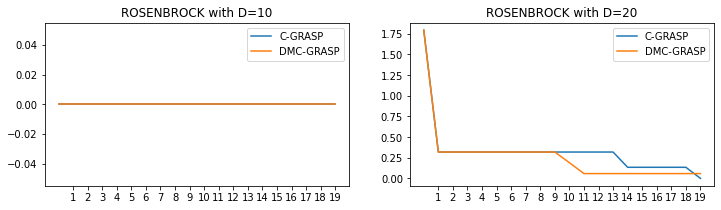

In [28]:
fig, (ax1, ax2) = plot.subplots(1, 2, figsize=fig_size)
plot_algorithm_performance('ROSENBROCK', 10, ax1)
plot_algorithm_performance('ROSENBROCK', 20, ax2)

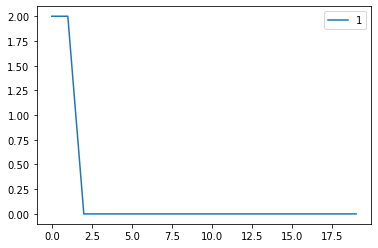

In [29]:
t=dmc_before_after_df.query("Func == 'BOOTH' and Dim == 2")
x=pd.DataFrame([t.iloc[0].index[2:],t.iloc[0].values[2:]]).T
x.plot()
plot.show() 

In [30]:
list_of_instances = []
for index, row in algorthms_df[['Func', 'Dim']].iterrows():
    list_of_instances.append((row['Func'], row['Dim']))
    
print(list_of_instances)    

[('BEALE', 2), ('BOHACHEVSKY', 2), ('BOOTH', 2), ('BRANIN', 2), ('EASOM', 2), ('GOLDSTEINPRICE', 2), ('MATYAS', 2), ('HUMP', 2), ('ROSENBROCK', 2), ('SCHWEFEL', 2), ('SHUBERT', 2), ('ZAKHAROV', 2), ('SPHERE', 3), ('HARTMANN', 3), ('COLVILLE', 4), ('PERM', 4), ('PERM0', 4), ('POWERSUM', 4), ('SHEKEL', 5), ('SHEKEL', 7), ('SHEKEL', 10), ('ROSENBROCK', 5), ('ZAKHAROV', 5), ('HARTMANN', 6), ('SCHWEFEL', 6), ('TRID', 6), ('GRIEWANK', 10), ('RASTRIGIN', 10), ('ROSENBROCK', 10), ('SUMSQUARES', 10), ('TRID', 10), ('ZAKHAROV', 10), ('GRIEWANK', 20), ('RASTRIGIN', 20), ('ROSENBROCK', 20), ('SUMSQUARES', 20), ('ZAKHAROV', 20), ('POWELL', 24), ('DIXONPRICE', 25), ('ACKLEY', 30), ('LEVY', 30), ('SPHERE', 30)]


<ipython-input-31-351b6e6f1206>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plot.subplots(1, 2, figsize=fig_size)


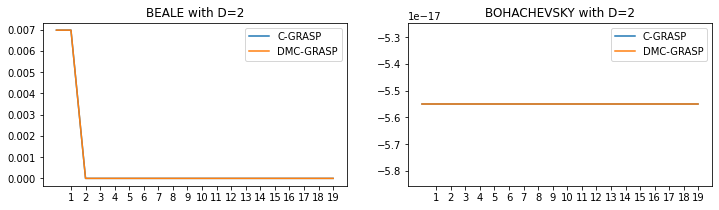

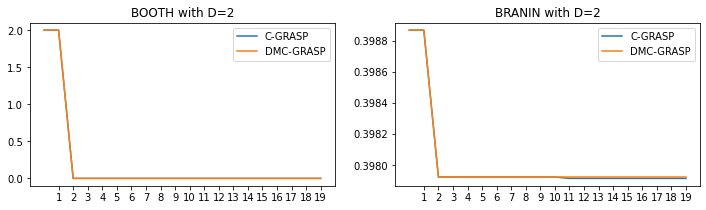

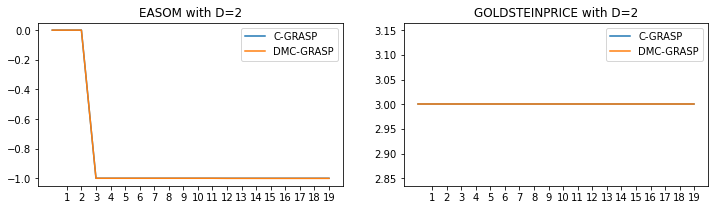

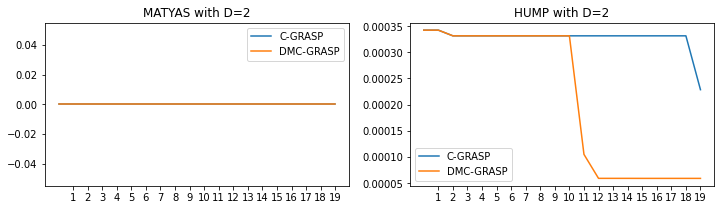

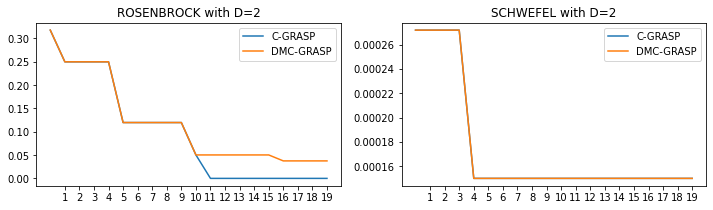

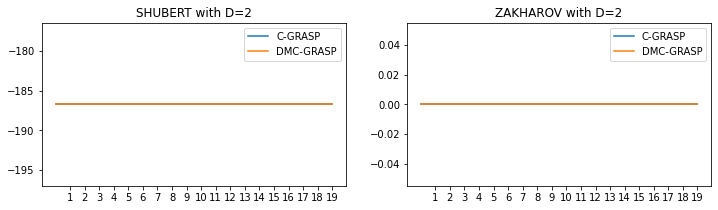

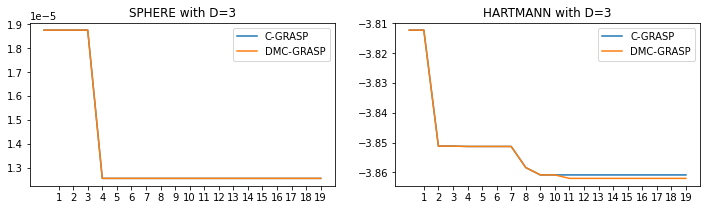

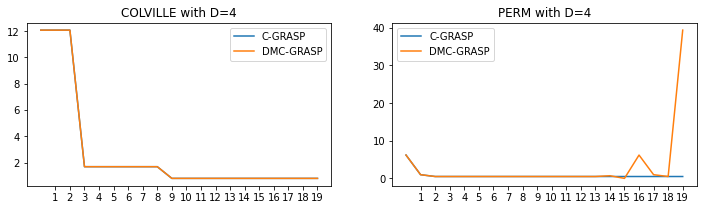

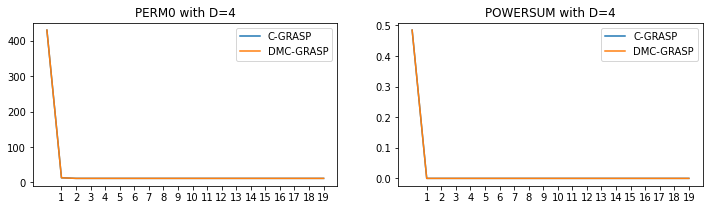

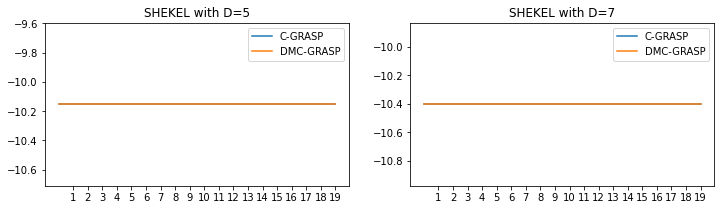

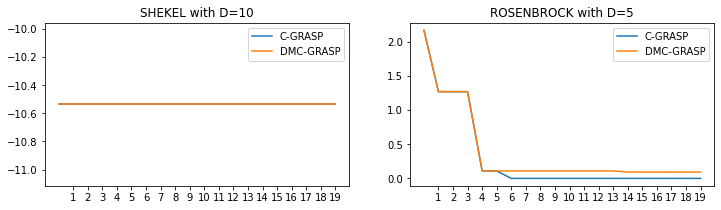

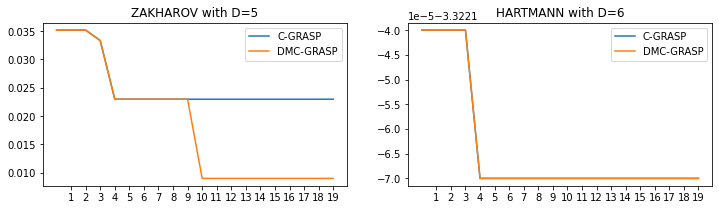

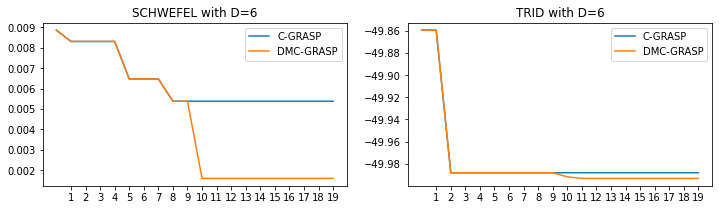

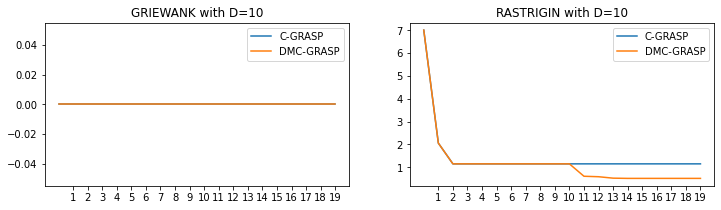

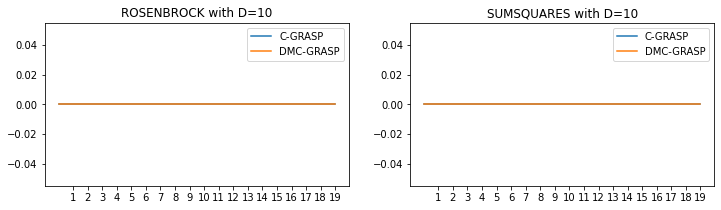

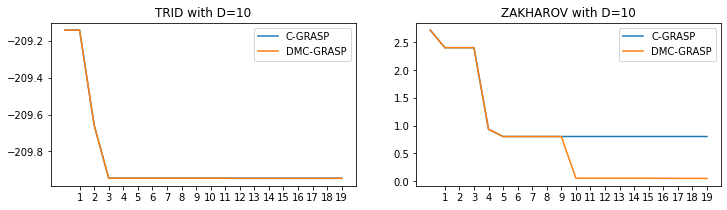

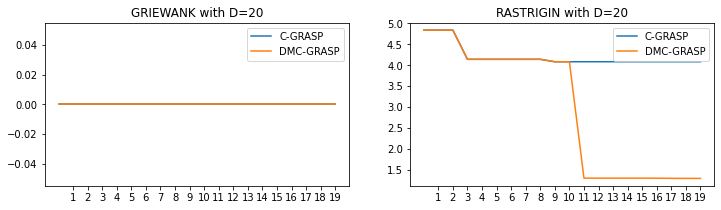

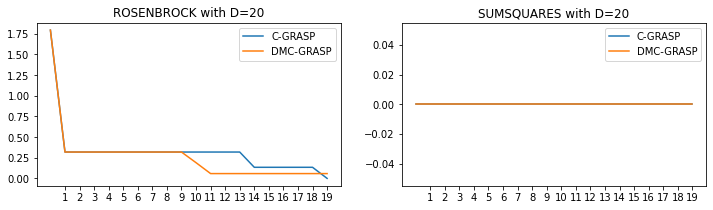

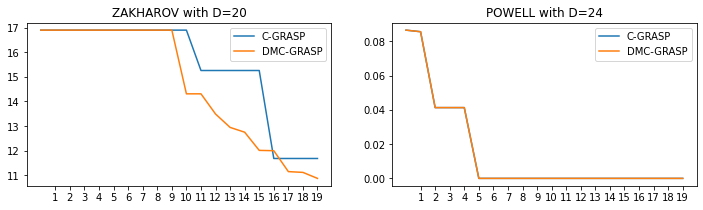

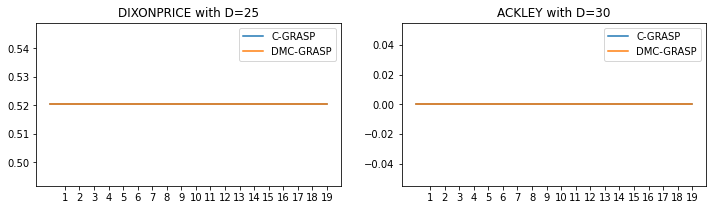

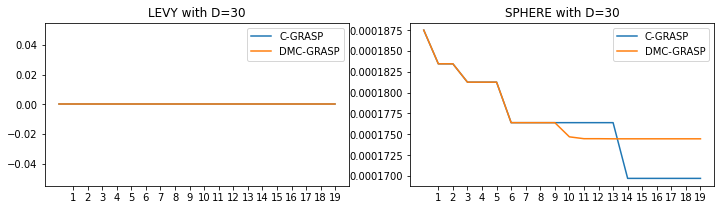

In [31]:
for instance1, instance2 in zip(list_of_instances[0::2], list_of_instances[1::2]):
    fig, (ax1, ax2) = plot.subplots(1, 2, figsize=fig_size)
    plot_algorithm_performance(instance1[0], instance1[1], ax1)
    plot_algorithm_performance(instance2[0], instance2[1], ax2)

In [32]:
func="BRANIN"
dim="2"

elite_df = pd.read_csv("./results/backup/BY_CFOs/DMC/elite/"+ str(seed) +"/"+func+"-"+dim+".csv", sep=";")

FileNotFoundError: [Errno 2] No such file or directory: './results/backup/BY_CFOs/DMC/elite/270100/BRANIN-2.csv'

In [40]:
import math
def f(x, y):
    a = 1.0
    b = 5.1/(4.0 * math.pi**2)
    c = 5.0/math.pi
    r = 6.0
    s = 10.0
    t = 1.0/(8.0 * math.pi)

    return a * (y - b*x**2 + c*x - r)**2 + s * (1 - t)*np.cos(x) + s

In [41]:
x = np.linspace(-5, 15, 100)
y = np.linspace(-5, 15, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

NameError: name 'itemgetter' is not defined

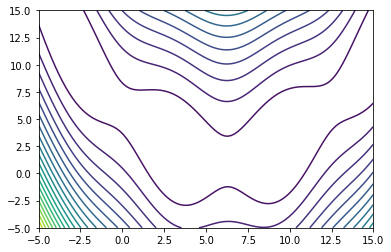

In [42]:
plot.contour(X, Y, Z, 20);
#plot.plot(elite_df['x1'], elite_df['x2'], 'rx')

xb = list(map(itemgetter(0), centers))
yb = list(map(itemgetter(1), centers))
plot.plot(xb, yb, 'gx')

In [43]:
elite_df

NameError: name 'elite_df' is not defined

In [44]:
elite_df[['x1','x2']]

NameError: name 'elite_df' is not defined

In [135]:
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

sample = elite_df[['x1','x2']]

start_centers = kmeans_plusplus_initializer(sample, 1).initialize()
xmeans_instance_2 = xmeans(sample, start_centers, 10);
xmeans_instance_2.process()

clusters = xmeans_instance_2.get_clusters()
centers = xmeans_instance_2.get_centers()

In [136]:
centers

[[3.13428, 2.28125],
 [9.428585714285715, 2.4912285714285716],
 [-3.13472, 12.25],
 [-3.13472, 12.2803]]

In [133]:
from operator import itemgetter
b = map(itemgetter(0), centers)

In [134]:
clusters

[[0, 3, 4, 5, 7, 8, 9], [1], [6], [2]]